**Table of contents**<a id='toc0_'></a>    
- [SVM](#toc1_1_)    
  - [Linear decision boundary](#toc1_2_)    
    - [Generate a dataset](#toc1_2_1_)    
    - [fit a linear regression model (SVM) to it](#toc1_2_2_)    
    - [Fit results](#toc1_2_3_)    
    - [New test point and explicitely predict through the decision function ](#toc1_2_4_)    
    - [Through model prediction](#toc1_2_5_)    
  - [Non linear decision boundary](#toc1_3_)    
    - [create a dataset](#toc1_3_1_)    
    - [Manually create polynomial features](#toc1_3_2_)    
    - [Manually create polynomial features (through sklearn library)](#toc1_3_3_)    
    - [Through Kernel](#toc1_3_4_)    
  - [Gaussion kernel](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[SVM](#toc0_)

In [94]:
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns


from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions



import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

## <a id='toc1_2_'></a>[Linear decision boundary](#toc0_)

### <a id='toc1_2_1_'></a>[Generate a dataset](#toc0_)

In [ ]:
X = np.array([
    [1, 2], [2, 3], [3, 3], [4,2],  # class -1
    [6, 5], [7, 8], [8, 6], [9, 9]    # class +1
])
y = np.array([-1, -1, -1,-1,  1, 1, 1, 1])  # labels as -1 and +1


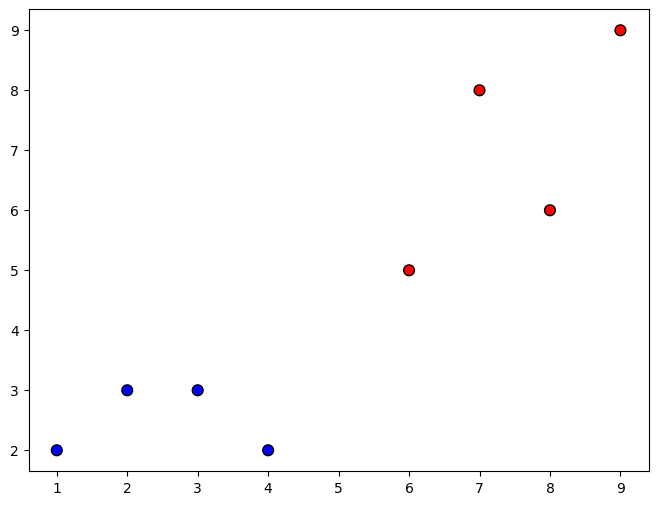

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=60, edgecolors='k')
plt.show()

### <a id='toc1_2_2_'></a>[fit a linear regression model (SVM) to it](#toc0_)

In [12]:
# 2. Train linear SVM
clf = SVC(kernel='linear', C=1)
_ = clf.fit(X, y)


### <a id='toc1_2_3_'></a>[Fit results](#toc0_)

In [13]:

# 3. Extract support vectors and alphas
support_vectors = clf.support_vectors_
dual_coefs = clf.dual_coef_[0]       # contains alpha_i * y_i
sv_indices = clf.support_
alphas = dual_coefs / y[sv_indices]  # recover alpha_i
b = clf.intercept_[0]

print("Support vectors:\n", support_vectors)
print("Alphas (Lagrange multipliers):\n", alphas)
print("Bias term b:", b)


Support vectors:
 [[3. 3.]
 [4. 2.]
 [6. 5.]]
Alphas (Lagrange multipliers):
 [0.07988166 0.08010924 0.1599909 ]
Bias term b: -3.3997117281140965


### <a id='toc1_2_4_'></a>[New test point and explicitely predict through the decision function ](#toc0_)


 $$f(x) = \text{sign}\Big(\sum_i \alpha_i y_i (x_i \cdot x) + b\Big)$$

In [15]:

# 4. New test points
X_new = np.array([[3, 4], [3, 2], [5, 6]])  # two test points

# --- Explicit calculation ---
def explicit_predict(x):
    decision_value = np.sum(alphas * y[sv_indices] * (support_vectors @ x.T)) + b
    return np.sign(decision_value), decision_value

results_explicit = [explicit_predict(x) for x in X_new]
results_model = clf.predict(X_new)

print("\nNew points predictions:")
for i, x in enumerate(X_new):
    print(f"Point {x}:")
    print("  Explicit -> pred:", results_explicit[i][0], " decision:", results_explicit[i][1])
    print("  Model    -> pred:", results_model[i])



New points predictions:
Point [3 4]:
  Explicit -> pred: -1.0  decision: -0.5997572447276593
  Model    -> pred: -1
Point [3 2]:
  Explicit -> pred: -1.0  decision: -1.3999393111819147
  Model    -> pred: -1
Point [5 6]:
  Explicit -> pred: 1.0  decision: 1.000151722045214
  Model    -> pred: 1


### <a id='toc1_2_5_'></a>[Through model prediction](#toc0_)

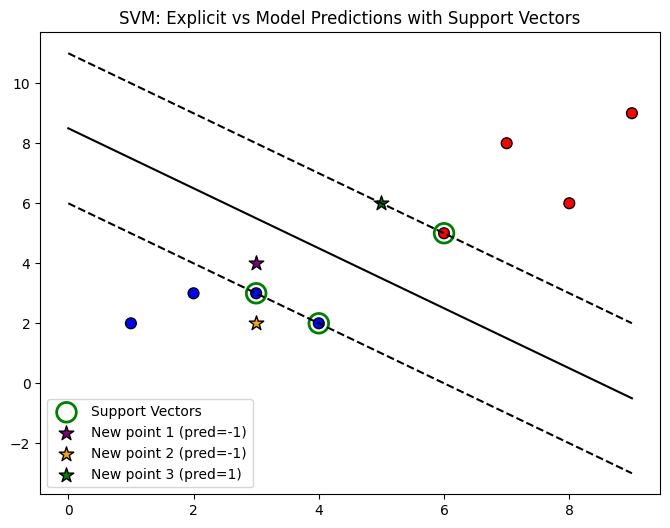

In [16]:

# 5. Plotting
plt.figure(figsize=(8,6))

# Plot training data
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=60, edgecolors='k')

# Plot support vectors
plt.scatter(support_vectors[:,0], support_vectors[:,1],
            s=200, facecolors='none', edgecolors='g', linewidths=2,
            label="Support Vectors")

# Plot new points (predictions by model)
colors = ['purple', 'orange', 'green']
for i, x in enumerate(X_new):
    plt.scatter(x[0], x[1], c=colors[i], s=120, marker='*', edgecolors='k',
                label=f"New point {i+1} (pred={results_model[i]})")

# Plot decision boundary
w = np.dot(alphas * y[sv_indices], support_vectors)
xx = np.linspace(0, 9, 100)
yy = -(w[0] * xx + b) / w[1]
plt.plot(xx, yy, 'k-')

# Plot margins
margin = 1 / np.linalg.norm(w)
yy_margin1 = -(w[0] * xx + b - 1) / w[1]
yy_margin2 = -(w[0] * xx + b + 1) / w[1]
plt.plot(xx, yy_margin1, 'k--')
plt.plot(xx, yy_margin2, 'k--')

plt.legend()
plt.title("SVM: Explicit vs Model Predictions with Support Vectors")
plt.show()


## <a id='toc1_3_'></a>[Non linear decision boundary](#toc0_)

### <a id='toc1_3_1_'></a>[create a dataset](#toc0_)

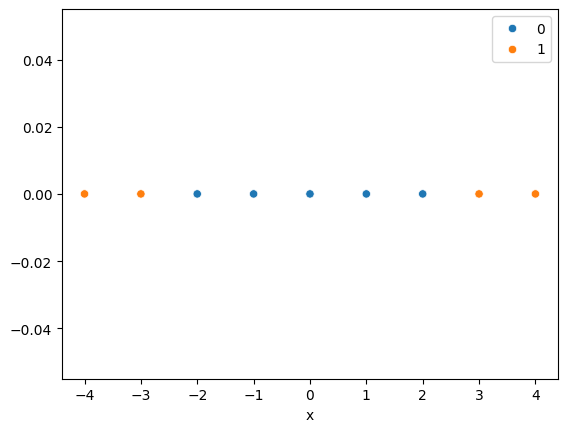

In [95]:
x = np.array([-4,-3,-2,-1, 0, 1, 2, 3, 4]).reshape(9,1)
y = np.array([ 1, 1, 0, 0, 0, 0, 0, 1, 1])
sns.scatterplot(x = x[:,0],y = np.zeros(9), hue=y)
plt.xlabel('x')
plt.show()

Now in this 1d, the linear decision boundary means $x=x_0$, but   such boundary can’t separate the two class. 

Now we introduce another new dimension and new feature space is  ($x_1 = x, x_2 = x^2$), $f(\vec{x}) = w_1 x_1 + w_2 x_2 +b $, the optiminal boundary is  $ w_1 = 0 , w_2 = 1, b = -6.5$. In this case the problem is still linear, but through introduction of new dimension. 

### <a id='toc1_3_2_'></a>[Manually create polynomial features](#toc0_)

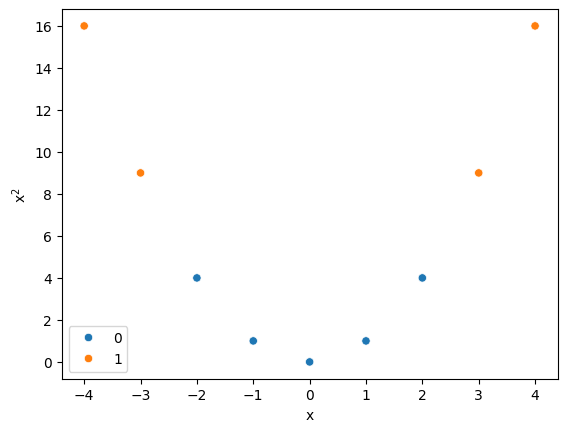

In [96]:
sns.scatterplot(x = x[:,0],y = (x**2)[:,0], hue=y)
plt.xlabel('x')
plt.ylabel('x$^2$')
plt.show()

In [97]:
x1 = x**2
X = np.hstack([x,x1])

In [99]:
ploy_kernel = Pipeline([
       ("Scaler", StandardScaler()),
       ("CVC", SVC(kernel='linear', C=1))
])
_ = ploy_kernel.fit(X,y)

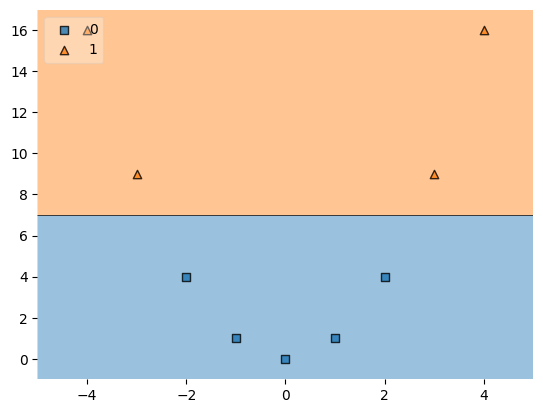

In [100]:
plot_decision_regions(X,y, clf=ploy_kernel, legend=2)
plt.show()

### <a id='toc1_3_3_'></a>[Manually create polynomial features (through sklearn library)](#toc0_)

In [103]:
svm_poly = Pipeline([
    ("poly_feature",PolynomialFeatures(degree=2)),
    ("scaler",StandardScaler()),
    ( "svm_clf",LinearSVC(C=1, loss="hinge"))
])
_ =svm_poly.fit(x,y)

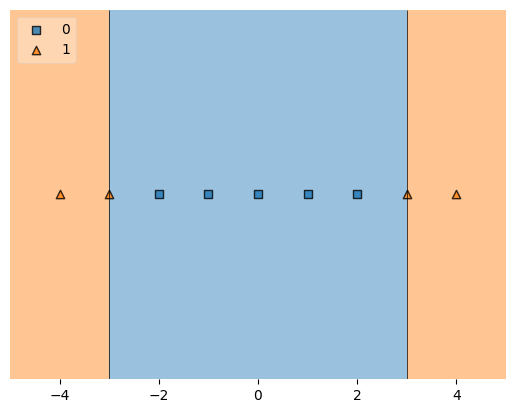

In [104]:
plot_decision_regions(x,y, clf=svm_poly, legend=2)
plt.show()

### <a id='toc1_3_4_'></a>[Through Kernel](#toc0_)

In [105]:
ploy_kernel = Pipeline([
       ("Scaler", StandardScaler()),
       ("Poly_kernel", SVC(kernel='poly', degree=2, C=1))
])
_ = ploy_kernel.fit(x,y)

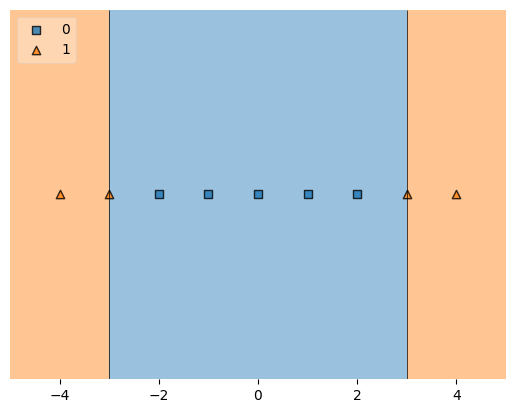

In [106]:
plot_decision_regions(x,y, clf=ploy_kernel, legend=2)
plt.show()

## <a id='toc1_4_'></a>[Gaussion kernel](#toc0_)

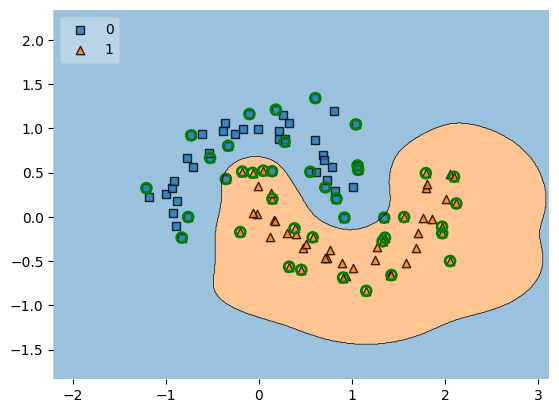

In [68]:
data = datasets.make_moons(noise=0.2, random_state= 0, n_samples = 100)
X = data[0]
y =  data[1]
ployrbf_kernel = Pipeline([
       ("Scaler", StandardScaler()),
       ("Poly_kernel", SVC(kernel='rbf', gamma=3, C=1))
])
ployrbf_kernel.fit(X,y)
plot_decision_regions(X,y, clf=ployrbf_kernel, legend=2)




scaler = ployrbf_kernel.named_steps["Scaler"]
svc = ployrbf_kernel.named_steps["Poly_kernel"]
support_vectors = scaler.inverse_transform(svc.support_vectors_)

# Plot support vectors
plt.scatter(support_vectors[:,0], support_vectors[:,1],
            s=50, facecolors='none', edgecolors='g', linewidths=2,
            label="Support Vectors")


plt.show()

In [69]:


# Extract scaler and SVC from pipeline
scaler = ployrbf_kernel.named_steps["Scaler"]
svc = ployrbf_kernel.named_steps["Poly_kernel"]

# Support vectors in original scale
support_vectors = scaler.inverse_transform(svc.support_vectors_)

dual_coefs = ployrbf_kernel[1].dual_coef_[0]       # contains alpha_i * y_i
sv_indices = ployrbf_kernel[1].support_
alphas = dual_coefs / y[sv_indices]  # recover alpha_i
b = ployrbf_kernel[1].intercept_[0]



/tmp/ipykernel_88457/3036981099.py:10: RuntimeWarning: divide by zero encountered in divide
  alphas = dual_coefs / y[sv_indices]  # recover alpha_i


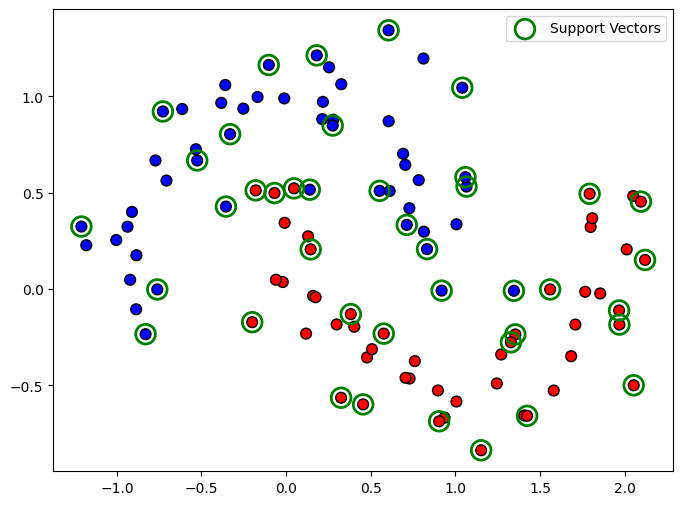

In [74]:

# 5. Plotting
plt.figure(figsize=(8,6))

# # Plot training data
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=60, edgecolors='k')

# Plot support vectors
plt.scatter(support_vectors[:,0], support_vectors[:,1],
            s=200, facecolors='none', edgecolors='g', linewidths=2,
            label="Support Vectors")
plt.legend()
plt.show()